# PREPARACIÓN Y EXPLORACIÓN DE DATOS

### USO DE LA BASE DE DATOS DEL EJEMPLO TITANIC

In [1]:
import pandas as pd 
import os
mainpath = "C:/Users/ACER/Desktop/Curso DSML_UNALM/Clase_3_Supervised Learning/"
filename = "titanic3.csv"
fullpath = os.path.join(mainpath,filename)

In [2]:
# Cómo se en qué ruta estoy?
os.getcwd()

'C:\\Users\\ACER\\Desktop\\Curso DSML_UNALM\\Clase_3_Supervised Learning'

In [3]:
# Cargar la base de datos con la librería pandas:
data = pd.read_csv(fullpath)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### ELIMINANDO NaN DEL DATAFRAME

In [4]:
#COLUMNAS QUE NO TENGAN MISSING - ELIMINAR COLUMNAS QUE CONTENGAN ALGÚN MISSING
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()

,pclass,survived,name,sex,sibsp,parch,ticket
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781


In [5]:
#FILAS QUE NO CONTENGAN MISSING
rows_with_na_dropped = data.dropna(axis=0)
rows_with_na_dropped.head(0)
# Ningún pasajero tiene los datos completos según la tabla

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [6]:
#IMPRIMIR NÚMERO DE COLUMNAS ORIGINALES Y COLUMNA FINALES
print("Columnas en el conjunto de datos original: %d \n" % data.shape[1])
print("Columnas finales: %d \n" % columns_with_na_dropped.shape[1])
# Se eliminaron las 7 columnas con datos NaN

Columnas en el conjunto de datos original: 14 

Columnas finales: 7 



In [7]:
#PORCENTAJE DE COLUMNAS EN MISSING
print(str(columns_with_na_dropped.shape[1]/data.shape[1]*100)+"%") #Convierte el valor numérico en un string

50.0%


In [9]:
#MÉTODO CATEGÓRICO PARA VER QUÉ COLUMNAS CONTIENEN ALGÚN MISSING
data.isnull().any() 

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

In [10]:
#BUSCANDO COLUMNAS CON VALORES NaN
null_columns=data.columns[data.isnull().any()]
print(null_columns)


Index(['age', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], dtype='object')


In [19]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum() 
#Visualizo sólo las columnas con NaN
print(data[data.isnull().any(axis=1)][null_columns].head())

       age      fare    cabin embarked boat   body  \
0  29.0000  211.3375       B5        S    2    NaN   
1   0.9167  151.5500  C22 C26        S   11    NaN   
2   2.0000  151.5500  C22 C26        S  NaN    NaN   
3  30.0000  151.5500  C22 C26        S  NaN  135.0   
4  25.0000  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  


In [11]:
data[data.any(axis=1)].shape # Ver dimensiones sin filtrado


(1309, 14)

In [15]:
null_columns.shape # Ver dimensiones de las columnas con valores NaN (filtradas)

(7,)

In [23]:
data[data.isnull().any(axis=1)].head(20) #Ver todas las filas que tengan un valor NaN ~ Todas tienen

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [24]:
#Número de missing por columns
data.isnull().sum() #Cantidad de datos missing según la variable --> body: No se encontró el cuerpo 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

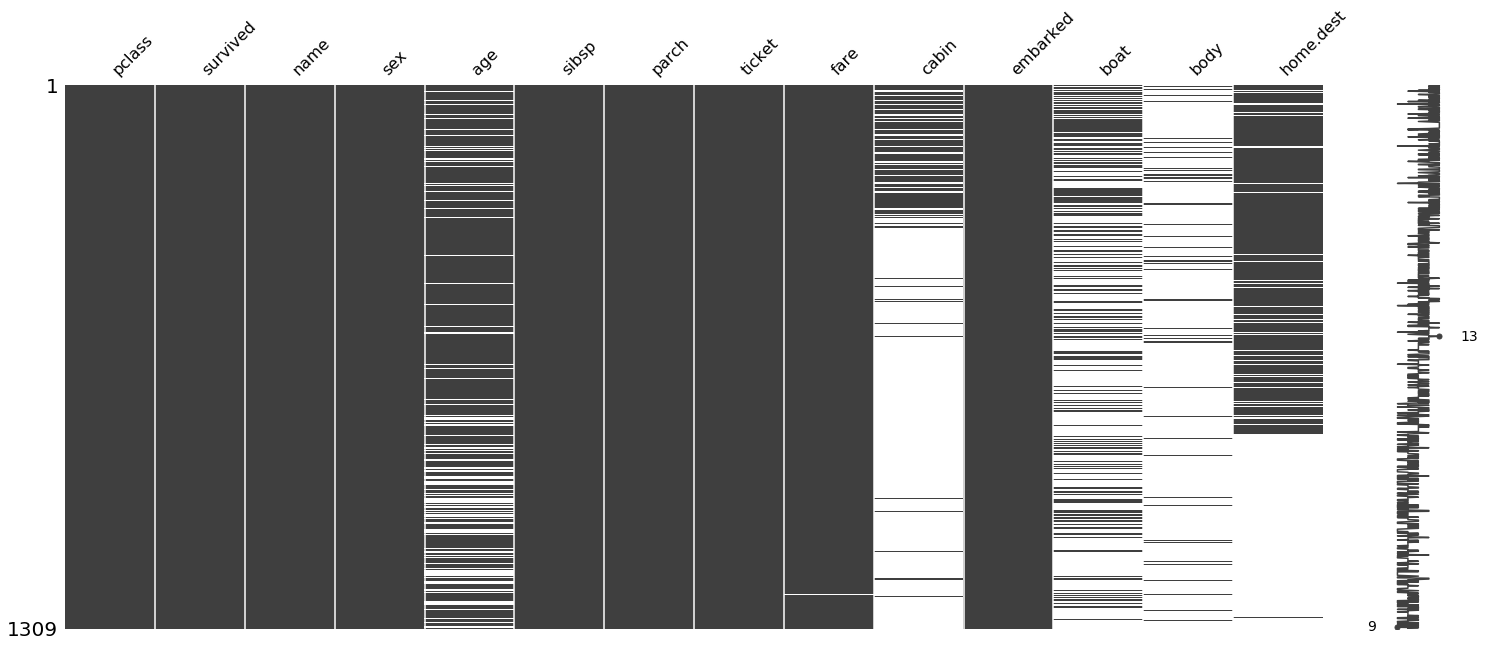

In [25]:
import missingno as msno #colores oscuros está entera, sino faltan datos / más multivariado cómo afecta a cada uno
msno.matrix(data)

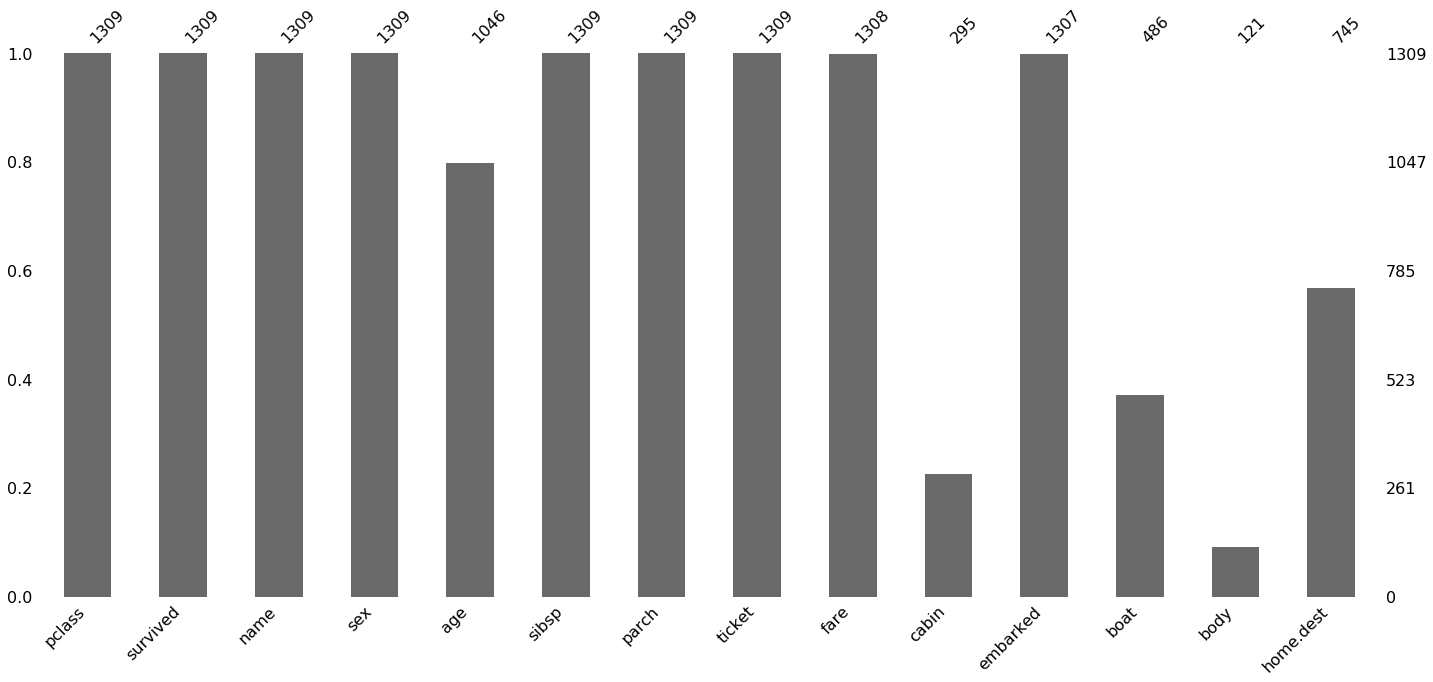

In [26]:
msno.bar(data) #Gráfico cuantitativos ~ adecuado para análisis multivariable

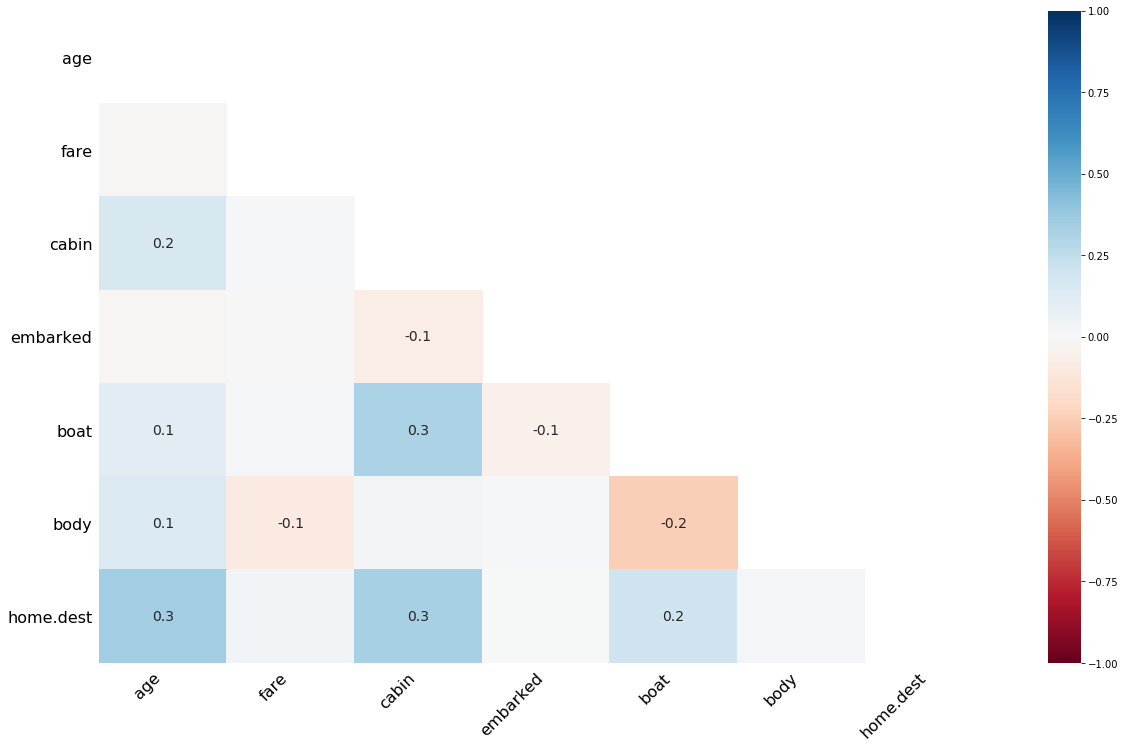

In [27]:
#matriz de correlaciones entre número de missing en cada columna
msno.heatmap(data)
#Dato: Correlación espuria / No hay dependencia de variables / Correlación no indica causalidad o influencia

## IMPUTACIONES 
### Previa verificación el % de missing data (si es más de 5% no es adecuado ~ en teoría)

In [31]:
data["age"] # Filtro la columna variable age de la data

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [29]:
data["age"].fillna(method="ffill") #forward fill- reemplaza el NaN con valor inmediatamente anterior ~ ojo:1305

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [30]:
data["age"].fillna(method="bfill") #backward fill - reemplaza el NaN valor inmediatamente después ~ ojo:1305

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    26.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

### ANÁLIS CON PARÁMETROS DE TENDENCIA CENTRAL

In [32]:
print(data["age"].mean())
print(data["age"].median()) 
print(data["age"].mode())
# La moda es 24 pero la media y mediana son mayores porque hay personas con mucho mayor edad

29.8811345124283
28.0
0    24.0
dtype: float64


### IMPUTANDO CON MEDIDAS DE TENDENCIA CENTRAL

In [34]:
data["age"].fillna(data["age"].median()) #Es mejor para imputar o reemplazar NaN cuando hay outlayers 

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    28.0000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [33]:
print("Promedio varones %d \n" % data[data["sex"]=="male"]["age"].mean()) #Media hombres

print("Promedio mujeres %d \n" % data[data["sex"]=="female"]["age"].mean()) #Media mujeres
#Se puede imputar según los sexos (Categoría) sí se diferencian bastante ambos grupos

Promedio varones 30 

Promedio mujeres 28 



In [36]:
data[data["sex"]=="male"]["age"].fillna(data[data["sex"]=="male"]["age"].mean()) #Reemplazo de los NaN con la media del sexo

1        0.916700
3       30.000000
5       48.000000
7       39.000000
9       71.000000
          ...    
1302    30.585233
1303    30.585233
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 843, dtype: float64

In [37]:
data[data["age"]< 18] .shape

(154, 14)

In [38]:
data[data["age"] >18] .shape

(853, 14)

## OUTLIERS

### Creación de la base de datos con random

In [39]:
import numpy as np
import random
np.random.seed(20) #Datos con aleatoriedad ~ pero para validar o replicar y que se repitan los valores aleatorios
mu, sigma = 0, 0.1 # para una standar
dat1 = np.random.normal(mu,sigma,1000) #Distr normal con media mu, desviacion sigma
dat2 = np.random.normal(mu,sigma,1000)
dat3 = np.random.normal(mu,sigma,1000)
dat4 = np.random.normal(mu,sigma,1000)
dat5 = np.random.normal(mu,sigma,1000)
dat1=pd.DataFrame(data=dat1, columns = ['C1']) #Conviriendo el array en data frame y nombrando la columna
dat2=pd.DataFrame(data=dat2, columns = ['C2'])
dat3=pd.DataFrame(data=dat3, columns = ['C3'])
dat4=pd.DataFrame(data=dat4, columns = ['C4'])
dat5=pd.DataFrame(data=dat5, columns = ['C5'])
final=pd.concat([dat1, dat2, dat3,dat4,dat5], axis=1) #Juntando los dataframe
final

,C1,C2,C3,C4,C5
0,0.088389,0.014160,0.122290,0.002702,0.107787
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669
2,0.035754,0.113429,-0.182908,0.058071,-0.066771
3,-0.234326,0.079154,0.012082,0.070045,0.135251
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278
...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363
996,-0.083846,-0.031427,0.103903,0.081073,0.022377
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919


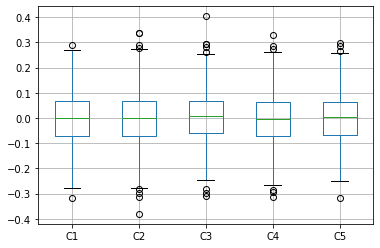

In [40]:
final.plot.box(grid="Tape") #Graficar un diagrama de caja para ver la dispersión, la media, los IQR, y outlayers

Text(0.5, 1.0, 'Título')

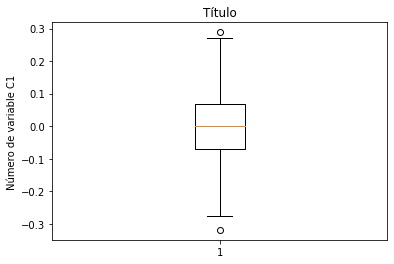

In [41]:
import matplotlib.pyplot as plt #Para diagramas
plt.boxplot(final["C1"]) 
plt.ylabel("Número de variable C1")
plt.title("Título")

In [42]:
final.iloc[23:24, 4:5]=final.iloc[23:24, 4:5]*10 #Selección de un rango del dataframe ~ como el excel/primeros filas y multiplicando x 10
final.iloc[60:61, 4:5]=final.iloc[60:61, 4:5]*10


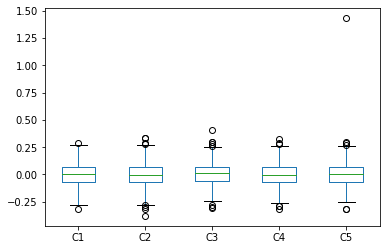

In [43]:
final.plot.box()

In [44]:
#valor outlier
iqr = final["C5"].quantile(0.75) - final["C5"].quantile(0.25) #Rango Intercuartílico 
print(final["C5"].quantile(0.75) - final["C5"].quantile(0.25))
final["flg_out"]=(final["C5"]< np.percentile(final["C5"], 25)-1.5*iqr) | (final["C5"]> np.percentile(final["C5"], 75)+1.5*iqr)
#Se agregó una columna para determinar si el valor es un outlayer. El rango de IQR puede cambiar
final

0.13247268620896427


,C1,C2,C3,C4,C5,flg_out
0,0.088389,0.014160,0.122290,0.002702,0.107787,False
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669,False
2,0.035754,0.113429,-0.182908,0.058071,-0.066771,False
3,-0.234326,0.079154,0.012082,0.070045,0.135251,False
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278,False
...,...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363,False
996,-0.083846,-0.031427,0.103903,0.081073,0.022377,False
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171,False
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919,False


In [45]:
final[final["flg_out"]==True] #Columna solo con outlayers

,C1,C2,C3,C4,C5,flg_out
23,0.133278,0.040309,-0.044483,-0.029653,-0.312961,True
57,0.150340,-0.017031,0.067384,-0.018522,0.286735,True
60,-0.082869,0.075935,0.085516,0.032553,1.431494,True
578,-0.017556,0.099622,0.041694,-0.038314,0.299323,True
789,-0.142838,0.127591,-0.085560,0.142109,-0.315420,True
934,0.165524,-0.154261,-0.030113,0.033099,0.265841,True


### PUNTUACIÓN Z

In [46]:
from sklearn import preprocessing #Importando la librería de preprocesamiento 
#processing.scale sirve para centrar los valores array cero pero mantiene la misma magnitud de la varianza (disminuye la escala)
#pero mantiene la misma distribución
p1=preprocessing.scale(final["C5"]) #Preprocesando los valores float outlayer de las variables que tienen outlayers
final["flg_out2"]=abs(p1)>2 #agregando la condición booleana si p1
final

,C1,C2,C3,C4,C5,flg_out,flg_out2
0,0.088389,0.014160,0.122290,0.002702,0.107787,False,False
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669,False,False
2,0.035754,0.113429,-0.182908,0.058071,-0.066771,False,False
3,-0.234326,0.079154,0.012082,0.070045,0.135251,False,False
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278,False,False
...,...,...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363,False,False
996,-0.083846,-0.031427,0.103903,0.081073,0.022377,False,False
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171,False,False
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919,False,False


In [54]:
final[final["flg_out2"]==True] #Busca outlayers

,C1,C2,C3,C4,C5,flg_out,flg_out2,mr,index
23,0.133278,0.040309,-0.044483,-0.029653,-0.312961,True,True,10.954685,23
57,0.150340,-0.017031,0.067384,-0.018522,0.286735,True,True,9.555150,57
60,-0.082869,0.075935,0.085516,0.032553,1.431494,True,True,179.436119,60
79,0.048740,-0.028125,-0.131821,0.016281,-0.248788,False,True,7.604579,79
122,0.160599,0.045370,0.038516,-0.122487,-0.224194,False,True,8.884393,122
174,0.042905,-0.033514,0.051242,-0.082272,-0.238704,False,True,6.125434,174
207,0.171228,0.198677,0.127696,-0.153090,0.224351,False,True,14.743478,207
212,0.054157,-0.017794,0.110644,0.060262,0.216929,False,True,5.731871,212
252,0.180101,-0.127071,-0.112719,0.081054,0.250721,False,True,12.857313,252
255,-0.114817,-0.038633,0.138094,0.030414,-0.217423,False,True,7.559192,255


### ESTIMADORES ROBUSTOS

In [56]:
final2=final.iloc[:, 0:5] #filtrando columnas c1-c5 y guardando en final2
final2

,C1,C2,C3,C4,C5
0,0.088389,0.014160,0.122290,0.002702,0.107787
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669
2,0.035754,0.113429,-0.182908,0.058071,-0.066771
3,-0.234326,0.079154,0.012082,0.070045,0.135251
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278
...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363
996,-0.083846,-0.031427,0.103903,0.081073,0.022377
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919


In [49]:
from scipy.spatial.distance import mahalanobis
import scipy as sp #algoritmos matemáticos
import pandas as pd #para los array o data frame

x = final2 #dataframe de entrada
#x = x.iloc[:,1:] 

#matriz de covarianzas
Sx = x.cov().values 
#inversa de la matriz de covarianzas
Sx = sp.linalg.inv(Sx)

mean = x.mean().values #Valores medios

def mahalanobisR(X,meanCol,IC):
    m = [] 
    for i in range(X.shape[0]):
        m.append(mahalanobis(X.iloc[i,:],meanCol,IC) ** 2)
    return(m)

mR = pd.DataFrame(mahalanobisR(x,mean,Sx), columns = ['mR'])
final['mr']=mR

In [50]:
final['index'] = final.index
final

,C1,C2,C3,C4,C5,flg_out,flg_out2,mr,index
0,0.088389,0.014160,0.122290,0.002702,0.107787,False,False,3.186345,0
1,0.019587,-0.054995,-0.049631,-0.051860,0.129669,False,False,2.404597,1
2,0.035754,0.113429,-0.182908,0.058071,-0.066771,False,False,5.705727,2
3,-0.234326,0.079154,0.012082,0.070045,0.135251,False,False,8.542547,3
4,-0.108483,-0.003539,0.030109,-0.045035,-0.043278,False,False,1.655564,4
...,...,...,...,...,...,...,...,...,...
995,-0.077166,-0.163191,0.045152,-0.039525,0.107363,False,False,4.488254,995
996,-0.083846,-0.031427,0.103903,0.081073,0.022377,False,False,2.502722,996
997,-0.001413,-0.020870,-0.090211,0.052768,-0.196171,False,False,4.557502,997
998,0.207735,-0.008636,-0.053343,0.009226,-0.073919,False,False,5.457864,998


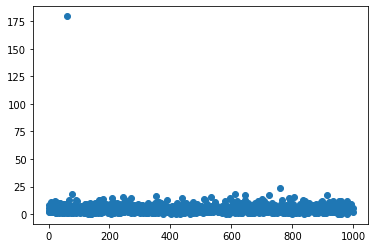

In [51]:
plt.scatter(final["index"],final['mr'])

In [52]:
final[final["mr"]>50]

,C1,C2,C3,C4,C5,flg_out,flg_out2,mr,index
60,-0.082869,0.075935,0.085516,0.032553,1.431494,True,True,179.436119,60


# Escalamiento o Transformación de datos

In [2]:
import pandas as pd
import os
mainpath = "C:/Users/ACER/Desktop/Curso DSML_UNALM/Clase_3_Supervised Learning/"
filename = "credit2.csv"
fullpath = os.path.join(mainpath, filename)
#CARGAR TUS BASES
data = pd.read_csv(fullpath,sep=";")
#data = pd.read_csv(fullpath,sep=';')
data.head(10)
data.dtypes
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo
...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo


In [57]:
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo
...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo


## Crear factores categóricos

In [59]:
# DEFINIENDO VALORES CATEGÓRICOS 0 --> CATEGORIA O
# Método dando número
data['Y_2'] = pd.factorize(data["Y"])[0]
data[['Y_2','Y']] 
# Método categorizando
data["Y_2"] = data["Y_2"].astype('category')
data["Y_2"]

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Y_2, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [61]:
data.dtypes

Y           object
Cuenta      object
Mes          int64
Ppag        object
Uso         object
DM           int64
Sexo        object
Estc        object
Y_2       category
dtype: object

### Normalización Z-score

In [3]:
from sklearn import preprocessing
data["DM_ZS"]=preprocessing.scale(data["DM"])
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_ZS
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,-0.787657
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,-0.167384
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,-0.861381
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,-0.407341
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,-0.389974
...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,-0.455191
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,-0.343187
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,3.334852
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1.133062


### Nor Min Max

In [4]:
#[a,b] [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

A = scaler.fit_transform(data[["DM"]])

data["DM_MM"]=pd.DataFrame(data=A)
data["DM_MM"].max()

1.0

### Escalamiento decimal

In [5]:
maxvect=max(abs(data["DM"]))
maxvect

18424

In [6]:
import math
kvector=math.floor(math.log10(maxvect))
kvector=kvector+1

In [7]:
scalefactor = 10**kvector
scalefactor

100000

In [8]:
data["DM_ED"]=data["DM"]/scalefactor

In [9]:
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_ZS,DM_MM,DM_ED
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,-0.787657,0.043964,0.01049
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,-0.167384,0.140255,0.02799
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,-0.861381,0.032519,0.00841
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,-0.407341,0.103004,0.02122
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,-0.389974,0.105700,0.02171
...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,-0.455191,0.095576,0.01987
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,-0.343187,0.112964,0.02303
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,3.334852,0.683944,0.12680
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1.133062,0.342137,0.06468


### Norm Sofmax

In [10]:
import numpy as np
A = preprocessing.scale(data["DM"])
M=pd.DataFrame(data=A,columns=["A"])
M
M["A"]=M["A"]*-1
M
N=1/(1+np.exp(M["A"]))
data["DM_SM"]=N
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_ZS,DM_MM,DM_ED,DM_SM
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,-0.787657,0.043964,0.01049,0.312672
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,-0.167384,0.140255,0.02799,0.458251
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,-0.861381,0.032519,0.00841,0.297051
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,-0.407341,0.103004,0.02122,0.399550
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,-0.389974,0.105700,0.02171,0.403724
...,...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,-0.455191,0.095576,0.01987,0.388127
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,-0.343187,0.112964,0.02303,0.415035
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,3.334852,0.683944,0.12680,0.965605
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1.133062,0.342137,0.06468,0.756403


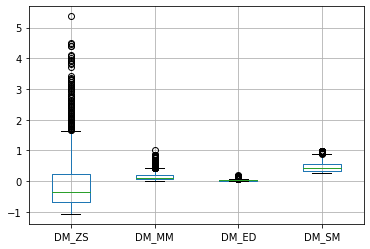

In [12]:
data.iloc[:,8:].plot.box(grid='True') #grid='True'
#Cuál uso? Para un modelamiento robusto --> No hay una mejor que otra, inclusive sin transformar

### Variables categóricas y transformaciones

In [ ]:
import pandas as pd
import os
mainpath = "C:/Users/ACER/Desktop/Curso DSML_UNALM/Clase_3_Supervised Learning/"
filename = "credit2.csv"
fullpath = os.path.join(mainpath, filename)
#CARGAR TUS BASES
data = pd.read_csv(fullpath,sep=";")
data.head(10)
data.dtypes
data

In [14]:
data # Se carga la data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_ZS,DM_MM,DM_ED,DM_SM
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,-0.787657,0.043964,0.01049,0.312672
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,-0.167384,0.140255,0.02799,0.458251
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,-0.861381,0.032519,0.00841,0.297051
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,-0.407341,0.103004,0.02122,0.399550
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,-0.389974,0.105700,0.02171,0.403724
...,...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,-0.455191,0.095576,0.01987,0.388127
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,-0.343187,0.112964,0.02303,0.415035
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,3.334852,0.683944,0.12680,0.965605
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1.133062,0.342137,0.06468,0.756403


## Factores de igual frecuencia

In [16]:
from feature_engine import discretisers as dsc # importar la librería de discretización de las variables

In [17]:
disc = dsc.EqualFrequencyDiscretiser(q=10, variables=['DM']) #Discretizador de igual frecuencia (en  10 grupos)
disc.fit(data) #
data_t= disc.transform(data)
data_t["N"]=1 #Contador
data_t

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_ZS,DM_MM,DM_ED,DM_SM,N
0,buen,no,18,pre buen pagador,privado,1,mujer,vive solo,-0.787657,0.043964,0.01049,0.312672,1
1,buen,no,9,pre buen pagador,profesional,5,hombre,no vive solo,-0.167384,0.140255,0.02799,0.458251,1
2,buen,bad running,12,pre buen pagador,profesional,0,mujer,vive solo,-0.861381,0.032519,0.00841,0.297051,1
3,buen,no,12,pre buen pagador,profesional,4,hombre,no vive solo,-0.407341,0.103004,0.02122,0.399550,1
4,buen,no,12,pre buen pagador,profesional,4,hombre,no vive solo,-0.389974,0.105700,0.02171,0.403724,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,4,hombre,no vive solo,-0.455191,0.095576,0.01987,0.388127,1
996,mal,no,24,pre buen pagador,profesional,4,hombre,no vive solo,-0.343187,0.112964,0.02303,0.415035,1
997,mal,good running,21,pre buen pagador,profesional,9,hombre,no vive solo,3.334852,0.683944,0.12680,0.965605,1
998,mal,bad running,12,pre buen pagador,privado,8,hombre,no vive solo,1.133062,0.342137,0.06468,0.756403,1


In [18]:

double_group = data_t.groupby(["DM"])

#double_group = data_t.groupby(["DM","Y"])
double_group.sum()[["N"]] #Sumar el contador

,N
DM,
0,100
1,101
2,99
3,100
4,100
5,100
6,101
7,99
8,100


## Factores de igual amplitud de intervalos

In [19]:
data["DM_OR"]=data["DM"] #Se guarda la data DM en otra variable (Columna) añadida
disc = dsc.EqualWidthDiscretiser(bins=10, variables=['DM']) #Se crean discretizadores de igual tamaño (en grupos de 10) coon las variables de "DM"
disc.fit(data) #
data_t2= disc.transform(data) #transforma la data de disc
data_t2["N"]=1
data_t2

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_ZS,DM_MM,DM_ED,DM_SM,DM_OR,N
0,buen,no,18,pre buen pagador,privado,0,mujer,vive solo,-0.787657,0.043964,0.01049,0.312672,1049,1
1,buen,no,9,pre buen pagador,profesional,1,hombre,no vive solo,-0.167384,0.140255,0.02799,0.458251,2799,1
2,buen,bad running,12,pre buen pagador,profesional,0,mujer,vive solo,-0.861381,0.032519,0.00841,0.297051,841,1
3,buen,no,12,pre buen pagador,profesional,1,hombre,no vive solo,-0.407341,0.103004,0.02122,0.399550,2122,1
4,buen,no,12,pre buen pagador,profesional,1,hombre,no vive solo,-0.389974,0.105700,0.02171,0.403724,2171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,0,hombre,no vive solo,-0.455191,0.095576,0.01987,0.388127,1987,1
996,mal,no,24,pre buen pagador,profesional,1,hombre,no vive solo,-0.343187,0.112964,0.02303,0.415035,2303,1
997,mal,good running,21,pre buen pagador,profesional,6,hombre,no vive solo,3.334852,0.683944,0.12680,0.965605,12680,1
998,mal,bad running,12,pre buen pagador,privado,3,hombre,no vive solo,1.133062,0.342137,0.06468,0.756403,6468,1


     DM_OR
DM        
0   573726
1   840770
2   442973
3   525439
4   315247
5   194260
6   169372
7   113014
8    78023
9    18424
18424
      N
DM     
0   445
1   293
2    97
3    80
4    38
5    19
6    14
7     8
8     5
9     1


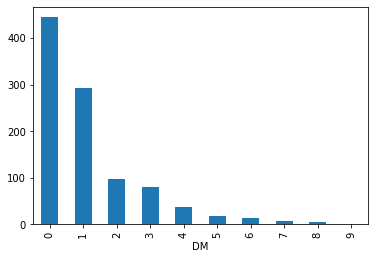

In [20]:
double_group = data_t2.groupby(["DM"])
double_group.sum()
print(double_group.sum()[["DM_OR"]])
print(max(data["DM_OR"]))
print(double_group.sum()[["N"]])
data_t2.groupby('DM')['DM'].count().plot.bar()

## DECISION TREE

In [21]:
X_train=data[["DM","Sexo"]]
data['Y_2'] = pd.factorize(data["Y"])[0]
y_train=data["Y_2"]

In [22]:
disc = dsc.DecisionTreeDiscretiser(cv=3,
                              scoring='neg_mean_squared_error',
                              variables=['DM'],
                              regression=True)

# fit the transformer
disc.fit(X_train, y_train)

# transform the data
data_t3= disc.transform(X_train)

In [23]:
data_t3
data["DM_3"]=data_t3["DM"]
data

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc,DM_ZS,DM_MM,DM_ED,DM_SM,DM_OR,Y_2,DM_3
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo,-0.787657,0.043964,0.01049,0.312672,1049,0,0.255751
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo,-0.167384,0.140255,0.02799,0.458251,2799,0,0.255751
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo,-0.861381,0.032519,0.00841,0.297051,841,0,0.255751
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo,-0.407341,0.103004,0.02122,0.399550,2122,0,0.255751
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo,-0.389974,0.105700,0.02171,0.403724,2171,0,0.255751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,mal,no,24,pre buen pagador,privado,1987,hombre,no vive solo,-0.455191,0.095576,0.01987,0.388127,1987,1,0.255751
996,mal,no,24,pre buen pagador,profesional,2303,hombre,no vive solo,-0.343187,0.112964,0.02303,0.415035,2303,1,0.255751
997,mal,good running,21,pre buen pagador,profesional,12680,hombre,no vive solo,3.334852,0.683944,0.12680,0.965605,12680,1,0.425287
998,mal,bad running,12,pre buen pagador,privado,6468,hombre,no vive solo,1.133062,0.342137,0.06468,0.756403,6468,1,0.425287


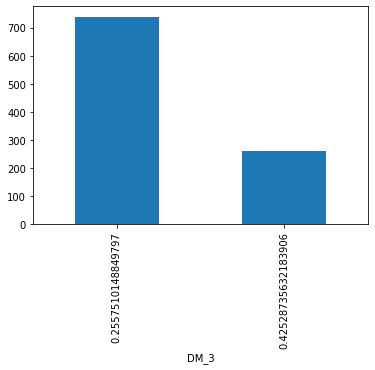

In [24]:
double_group = data.groupby(["DM_3"])
double_group.sum()
#print(double_group.sum()[["DM_OR"]])
#print(max(data["DM_OR"]))
#print(double_group.sum()[["N"]])
data.groupby('DM_3')['DM_3'].count().plot.bar()

## Transformación de variables

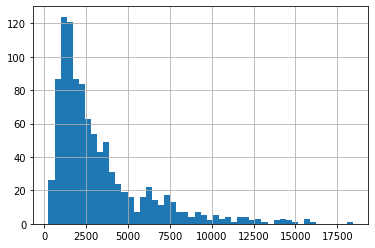

In [25]:
from feature_engine import variable_transformers as vt
# set up the variable transformer
tf = vt.LogTransformer(variables = ['DM'])

# fit the transformer
tf.fit(data)

# transform the data
data_t4= tf.transform(data)
data_t4

# un-transformed variable
data['DM'].hist(bins=50)

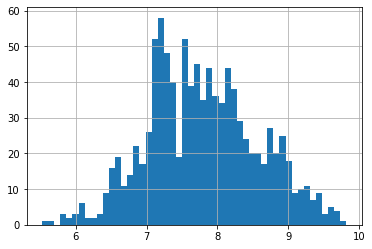

In [26]:
data_t4['DM'].hist(bins=50)

## Transformación exponencial

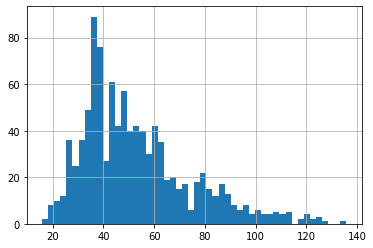

In [27]:
from feature_engine import variable_transformers as vt

# set up the variable transformer
tf = vt.PowerTransformer(variables = ['DM'], exp=0.5)

# fit the transformer
tf.fit(data)

# transform the data
data_t5= tf.transform(data)


# un-transformed variable
data_t5['DM'].hist(bins=50)

## Transformación Box Cox

Una transformación de Box-Cox de los datos de su proceso puede ayudar a corregir las siguientes condiciones: Los datos del proceso no están distribuidos normalmente y problemas de heterocedasticidad (la varianza de los errores no es constante)

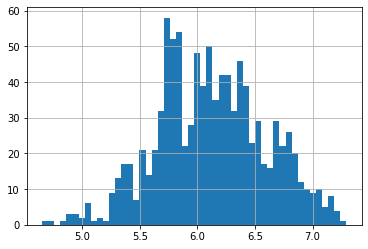

In [28]:
tf = vt.BoxCoxTransformer(variables = ['DM'])


tf.fit(data)


data_t5= tf.transform(data)


#box cox variable
data_t5['DM'].hist(bins=50)

## YeoJohnsonTransformer

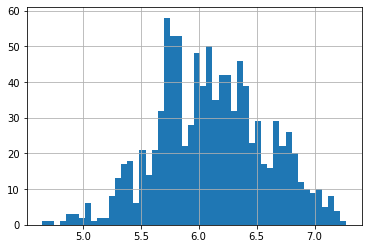

In [29]:
# set up the variable transformer
tf = vt.YeoJohnsonTransformer(variables = ['DM'])

# fit the transformer
tf.fit(data)

#Learns the optimal lambda for the Yeo-Johnson transformation.

# transform the data
data_t6= tf.transform(data)


# un-transformed variable
data_t6['DM'].hist(bins=50)

## Variables Dummy

In [30]:
data["Sexo"].head(10)

0     mujer
1    hombre
2     mujer
3    hombre
4    hombre
5    hombre
6    hombre
7    hombre
8     mujer
9     mujer
Name: Sexo, dtype: object

In [31]:
dummy_sex = pd.get_dummies(data["Sexo"], prefix="sex")

In [32]:
dummy_sex.head(10)

,sex_hombre,sex_mujer
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,0,1
